# Number Recognition
## Outlines of Notebook:
- Using tensorflow & keras
- Using Neural Networks
- Visualizing Data using matplotlib
- Using loss & Activation Function
- Normalizing Data
- Predicting Data
- Saving model


In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Loading Data Set from Mnist
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

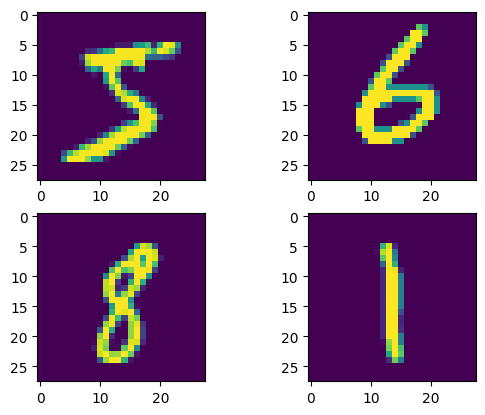

In [4]:
# visualizing Data sets before normalization
plt.subplot(2,2,1)
plt.imshow(x_train[0])
plt.subplot(2,2,2)
plt.imshow(x_train[66])
plt.subplot(2,2,3)
plt.imshow(x_train[300])
plt.subplot(2,2,4)
plt.imshow(x_train[14])
plt.show()

In [5]:
print(f"Number of rows of x_train is {x_train.shape[0]} & number of columns is {x_train.shape[1]}")
print(f"Number of rows of x_test is {x_test.shape[0]} & number of columns is {x_test.shape[1]}")

Number of rows of x_train is 60000 & number of columns is 28
Number of rows of x_test is 10000 & number of columns is 28


In [6]:
# Normalizing Data
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

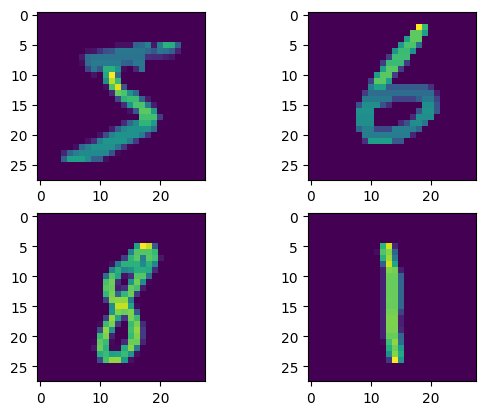

In [7]:
# visualizing Data sets after normalization
plt.subplot(2,2,1)
plt.imshow(x_train[0])
plt.subplot(2,2,2)
plt.imshow(x_train[66])
plt.subplot(2,2,3)
plt.imshow(x_train[300])
plt.subplot(2,2,4)
plt.imshow(x_train[14])
plt.show()

## Creating Model

In [13]:
# Creating model
model = Sequential([
    Flatten(),
    Dense(units= 128, activation= "relu"),
    Dense(units=128, activation="relu"),
    Dense(units= 10, activation= "softmax"),
    
])

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), optimizer= "adam", metrics= ["accuracy"])

model.fit(x_train, y_train, epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9222
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9770


In [16]:
# evaluating model on test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Losses for test set: {val_loss}")
print(f"Accuracy for test set:{val_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9745
Losses for test set: 0.0815831795334816
Accuracy for test set:0.9745000004768372


## Making Predictions:

In [17]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[2.76211836e-08, 1.60735780e-07, 2.10604267e-05, ...,
        9.99961138e-01, 1.98681050e-07, 4.06682511e-06],
       [2.36344817e-07, 1.06834545e-04, 9.99777496e-01, ...,
        4.33135426e-07, 1.13728252e-04, 1.25765565e-10],
       [5.48575834e-08, 9.99764979e-01, 3.00266893e-05, ...,
        9.74848517e-05, 5.06259166e-05, 8.71253064e-07],
       ...,
       [8.36787861e-10, 2.84229372e-06, 4.57788332e-08, ...,
        3.13582830e-04, 4.50448060e-05, 3.80411875e-05],
       [1.65062048e-07, 2.70071638e-07, 6.28921804e-09, ...,
        1.66747949e-08, 8.12196359e-03, 2.62543813e-06],
       [8.34318485e-07, 4.10423944e-08, 4.74912486e-06, ...,
        1.33488589e-08, 8.86315775e-07, 4.19566710e-08]], dtype=float32)

In [18]:
for i in range(8):
    print(f"For interation {i}, prediction will be: {np.argmax(predictions[i])}")

For interation 0, prediction will be: 7
For interation 1, prediction will be: 2
For interation 2, prediction will be: 1
For interation 3, prediction will be: 0
For interation 4, prediction will be: 4
For interation 5, prediction will be: 1
For interation 6, prediction will be: 4
For interation 7, prediction will be: 9


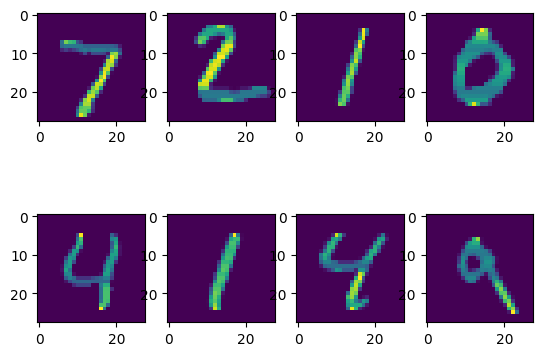

In [19]:
# Comparing Results
for i in range(8):
    plt.subplot(2,4,i + 1)
    plt.imshow(x_test[i])
plt.show()

## Saving Model

In [15]:
model.save("Number_Recognition_0_to_9")

INFO:tensorflow:Assets written to: Number_Recognition_0_to_9\assets


INFO:tensorflow:Assets written to: Number_Recognition_0_to_9\assets
